In [1]:
import tensorflow as tf 
from d2l import tensorflow as d2l
from util.MLPutils import Animator3D, IteratorEx
import pandas as pd

In [2]:
num_outputs, num_hiddens1, num_hiddens2 = 10, 256, 256

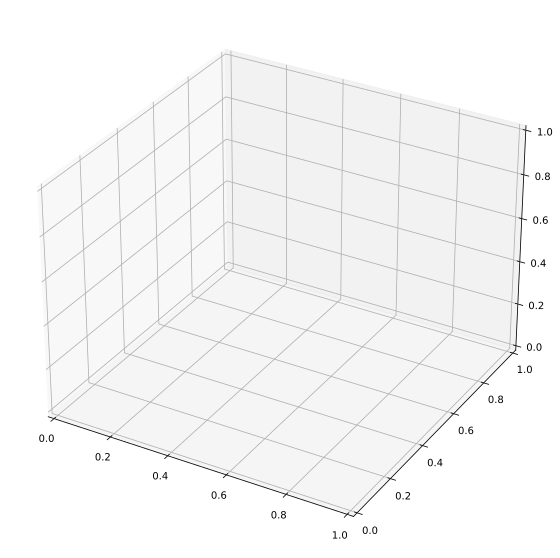

In [3]:
animator = Animator3D(xlabel = 'dropout1',ylabel = 'dropout2',
                      xlim = [0, 1], ylim =[0, 1],zlim = [0, 2.5] , 
                      legend=['train loss', 'train acc', 'test acc'])

In [4]:
def train_ch3( train_iter, test_iter, loss, num_epochs, updater, dropout1, dropout2):
    net = tf.keras.models.Sequential(([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_hiddens1, activation=tf.nn.relu),
    tf.keras.layers.Dropout(dropout1),
    tf.keras.layers.Dense(num_hiddens2, activation=tf.nn.relu),
    tf.keras.layers.Dropout(dropout2),
    tf.keras.layers.Dense(num_outputs)
    ]))
    
    epoch_gen = IteratorEx(range(num_epochs))
    while epoch_gen.hasNext :
        d2l.train_epoch_ch3(net, train_iter, loss, updater)
        d2l.evaluate_accuracy(net, test_iter)
        epoch_gen.next()
    train_metrics = d2l.train_epoch_ch3(net, train_iter, loss, updater)
    test_acc = d2l.evaluate_accuracy(net, test_iter)
    animator.add(dropout1,dropout2, train_metrics + (test_acc , )) 
    train_loss, train_acc  =  train_metrics
    return (train_acc, test_acc, train_loss)

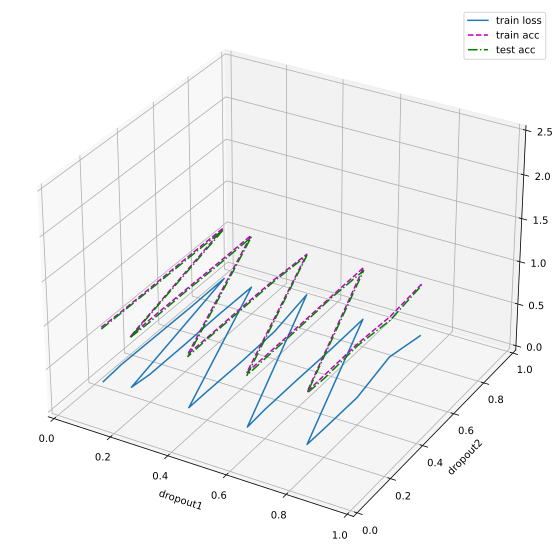

In [5]:
num_epochs, lr, batch_size, = 10, .5, 256
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = tf.keras.optimizers.SGD(learning_rate=lr)
dropout_losses = []
droput_indices = []
for dropout1 in [0.1, .2, .4, .6, .8]:
    for dropout2 in [0.1, .2, .4, .6, .8]:
        droput_indices.append((dropout1,dropout2))
        train_acc, test_acc, train_loss = train_ch3( train_iter, test_iter, loss, num_epochs, trainer, dropout1, dropout2)
        train_metrics = train_loss, train_acc 
        animator.add(dropout1,dropout2, train_metrics + (test_acc , ))  
        dropout_losses.append((train_loss,train_acc,test_acc))

In [6]:
index = pd.MultiIndex.from_tuples(droput_indices, names = ["dropout1", "dropout2"])

In [7]:
dropout_losses = pd.DataFrame(dropout_losses, index = index, columns=["train_loss","train_acc","test_acc"])
dropout_losses

train_loss  train_acc  test_acc
dropout1 dropout2                                 
0.1      0.1         0.267846   0.899167    0.8796
         0.2         0.288757   0.891017    0.8769
         0.4         0.282708   0.892483    0.8746
         0.6         0.276373   0.896150    0.8760
         0.8         0.282316   0.894333    0.8738
0.2      0.1         0.307035   0.887367    0.8787
         0.2         0.274193   0.897117    0.8705
         0.4         0.272083   0.897767    0.8770
         0.6         0.281098   0.893967    0.8700
         0.8         0.272638   0.896150    0.8723
0.4      0.1         0.281193   0.895300    0.8689
         0.2         0.281206   0.893750    0.8779
         0.4         0.270694   0.897400    0.8767
         0.6         0.278259   0.895067    0.8761
         0.8         0.376176   0.860717    0.8450
0.6      0.1         0.271378   0.896650    0.8628
         0.2         0.286897   0.893250    0.8679
         0.4         0.284147   0.893683    0.8700
         0.6         0.274470   0.896767    0.8799
         0.8         0.279354   0.895317    0.8578
0.8      0.1         0.289522   0.890667    0.8747
         0.2         0.281105   0.894117    0.8579
         0.4         0.273314   0.897700    0.8757
         0.6         0.385642   0.857900    0.8145
         0.8         0.284683   0.893517    0.8775